In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'neural assignment/MLP/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


# WORK WITH MNIST DATASET

# Required library

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import model
from model import Model

# Required function

In [3]:
def one_hot_encode(y, classes=None):
    y = np.array(y)
    if classes is None:
        classes = np.unique(y)
    n_classes = len(classes)
    out = np.zeros((len(y), n_classes))
    for i in range(n_classes):
        out[np.argwhere(y == classes[i]), i] = 1
    return out


# Load Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train_origin = x_train.reshape(x_train.shape[0], -1) / 255
y_train_origin = one_hot_encode(y_train)
x_test_origin = x_test.reshape(x_test.shape[0], -1) / 255
y_test_origin = one_hot_encode(y_test)

## Batch learning

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_origin, y_train_origin, test_size=0.3)
ep = 200
mlp = Model()
mlp.add_layer(784, 200, act_fn='sigmoid')
mlp.add_layer(200, 128, act_fn='sigmoid')
mlp.add_layer(128, 64, act_fn='sigmoid')
mlp.add_layer(64, 10, act_fn='softmax')
losses, accs = mlp.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=x_train.shape[0], loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.46010078556116546 acc =  0.096
epoch  1 loss =  0.456933071213832 acc =  0.096
epoch  2 loss =  0.45456600035326306 acc =  0.21927777777777777
epoch  3 loss =  0.45268010791724667 acc =  0.22583333333333333
epoch  4 loss =  0.4510226957648502 acc =  0.19161111111111112
epoch  5 loss =  0.44947868997333595 acc =  0.1945
epoch  6 loss =  0.4480680079885022 acc =  0.20766666666666667
epoch  7 loss =  0.4468304949632103 acc =  0.23283333333333334
epoch  8 loss =  0.4457250126564971 acc =  0.25866666666666666
epoch  9 loss =  0.4446330998988029 acc =  0.3088888888888889
epoch  10 loss =  0.44343848635921224 acc =  0.2559444444444444
epoch  11 loss =  0.44208397797854154 acc =  0.2393888888888889
epoch  12 loss =  0.44057778387734897 acc =  0.27316666666666667
epoch  13 loss =  0.438967771095235 acc =  0.3461666666666667
epoch  14 loss =  0.43730839270843364 acc =  0.4087777777777778
epoch  15 loss =  0.43563594851446635 acc =  0.4052777777777778
epoch  16 loss =  0.433957

# Ploting

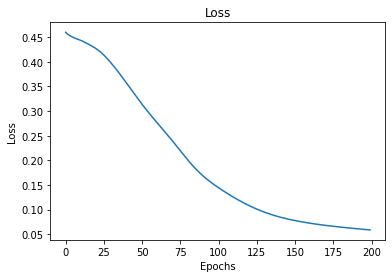

In [7]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

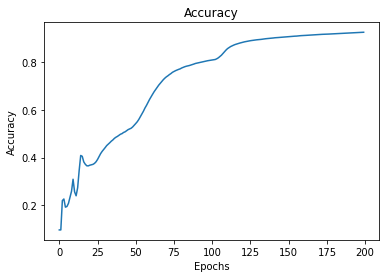

In [8]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Confusion matrix

In [9]:
pred = mlp.predict(x_test_origin)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_origin)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 961    0    2    1    0    9    4    1    2    0]
 [   0 1110    4    3    1    1    4    1   11    0]
 [  15    0  954    9   11    2    8    8   23    2]
 [   2    4   16  925    0   24    1   12   23    3]
 [   2    1    5    0  920    0   12    3    4   35]
 [  13    1    5   35    8  781   13    9   21    6]
 [  13    3    5    0   11   15  910    0    1    0]
 [   3    9   21    7    6    0    0  959    0   23]
 [   4    4    8   16   10   28    9   12  881    2]
 [   8    6    1   10   27   15    2   13    9  918]]


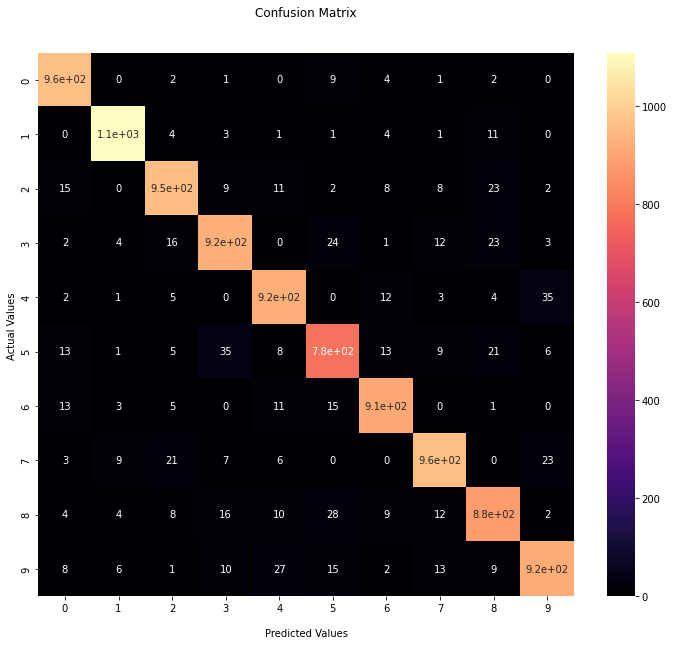

In [15]:
import seaborn as sns
fig = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(10))
ax.yaxis.set_ticklabels(i for i in range(10))

## Display the visualization of the Confusion Matrix.
plt.show()

In [12]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.93 


                      Classification Report                       
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.92      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.93      0.94      0.93       982
           5       0.89      0.88      0.88       892
           6       0.94      0.95      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.90      0.90      0.90       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## SGD

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_origin, y_train_origin, test_size=0.3)
ep = 10
mlp1 = Model()
mlp1.add_layer(784, 200, act_fn='sigmoid')
mlp1.add_layer(200, 128, act_fn='sigmoid')
mlp1.add_layer(128, 64, act_fn='sigmoid')
mlp1.add_layer(64, 10, act_fn='softmax')
losses1, accs1 = mlp1.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=1, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.03715312314341952 acc =  0.9523888888888888
epoch  1 loss =  0.032134973012030964 acc =  0.9585
epoch  2 loss =  0.02837564739929988 acc =  0.9646666666666667
epoch  3 loss =  0.028318313091023808 acc =  0.9646666666666667
epoch  4 loss =  0.02626747569479036 acc =  0.9676666666666667
epoch  5 loss =  0.02621877798961401 acc =  0.9676666666666667
epoch  6 loss =  0.026710904312501796 acc =  0.967
epoch  7 loss =  0.022759901736495388 acc =  0.972
epoch  8 loss =  0.025563956562228998 acc =  0.9697222222222223
epoch  9 loss =  0.025928104024984945 acc =  0.9689444444444445


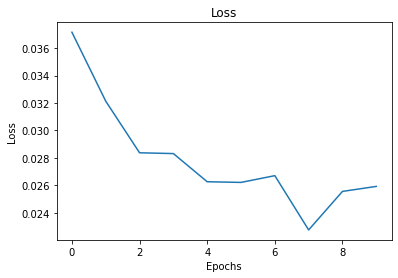

In [16]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses1)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

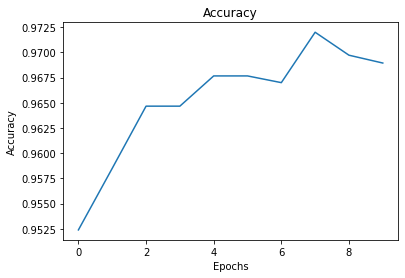

In [17]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs1)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [18]:
pred = mlp1.predict(x_test_origin)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_origin)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 965    0    0    1    1    2    2    3    2    4]
 [   0 1121    3    1    0    2    1    4    3    0]
 [   7    2 1000    6    1    0    2    9    5    0]
 [   0    0    6  982    0    3    0    6    1   12]
 [   3    0    3    0  945    1    6    6    0   18]
 [   1    0    0   18    1  867    1    1    1    2]
 [   4    1    1    0    5   28  918    1    0    0]
 [   1    3    8    3    0    0    0  986    2   25]
 [   2    4    3   10    7   16    2    3  912   15]
 [   3    3    0    3    9    2    0    6    0  983]]


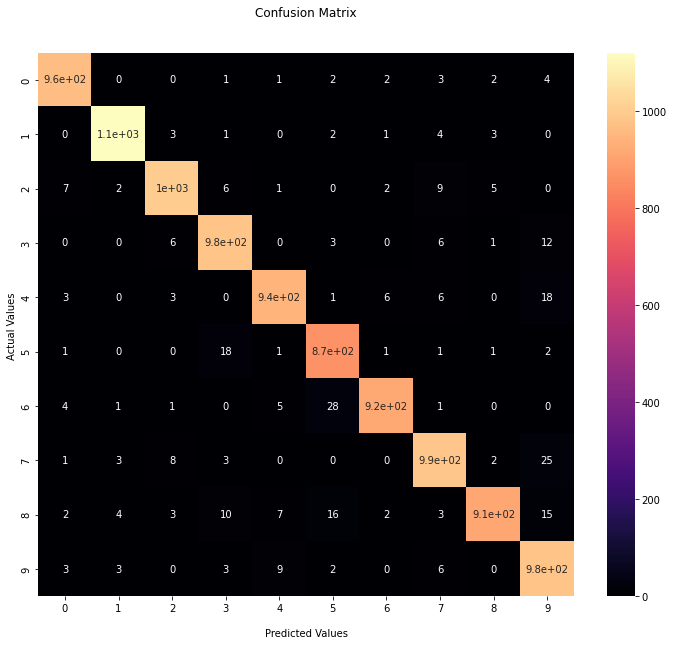

In [19]:
import seaborn as sns
fig = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(10))
ax.yaxis.set_ticklabels(i for i in range(10))

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.97 


                      Classification Report                       
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.94      0.97      0.96       892
           6       0.98      0.96      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Mini Batch

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_origin, y_train_origin, test_size=0.3)
ep = 40
mlp2 = Model()
mlp2.add_layer(784, 200, act_fn='sigmoid')
mlp2.add_layer(200, 128, act_fn='sigmoid')
mlp2.add_layer(128, 64, act_fn='sigmoid')
mlp2.add_layer(64, 10, act_fn='softmax')
losses2, accs2 = mlp2.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=256, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.12068381287399972 acc =  0.8726666666666667
epoch  1 loss =  0.0683680119670832 acc =  0.9138888888888889
epoch  2 loss =  0.055901940462740794 acc =  0.9275
epoch  3 loss =  0.0476625003246452 acc =  0.9391111111111111
epoch  4 loss =  0.04174915717942655 acc =  0.9455
epoch  5 loss =  0.03761267626803114 acc =  0.9516666666666667
epoch  6 loss =  0.034718885198268885 acc =  0.955
epoch  7 loss =  0.03265851508048671 acc =  0.9574444444444444
epoch  8 loss =  0.030841059965770638 acc =  0.9596111111111111
epoch  9 loss =  0.028732265575448165 acc =  0.9623333333333334
epoch  10 loss =  0.026989514131712918 acc =  0.9655
epoch  11 loss =  0.026243583094577333 acc =  0.9662777777777778
epoch  12 loss =  0.026130269929993063 acc =  0.9663888888888889
epoch  13 loss =  0.02529063082993284 acc =  0.9675555555555555
epoch  14 loss =  0.02357903558042208 acc =  0.9691111111111111
epoch  15 loss =  0.022237333787043158 acc =  0.9701666666666666
epoch  16 loss =  0.021392762

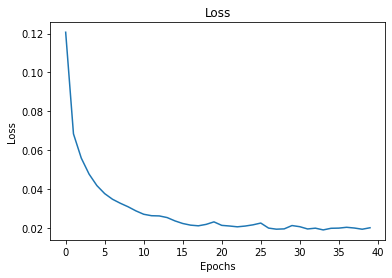

In [24]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses2)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

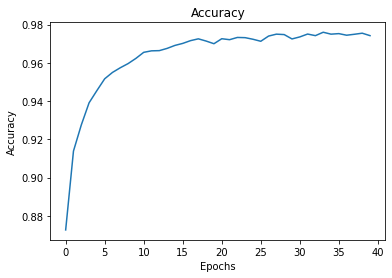

In [25]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs2)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [26]:
pred = mlp2.predict(x_test_origin)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_origin)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 971    0    1    2    0    0    3    1    2    0]
 [   0 1121    5    1    0    1    2    2    3    0]
 [   2    2 1016    1    3    0    2    4    2    0]
 [   0    0    8  982    1    4    0    6    6    3]
 [   0    0    2    0  963    0    6    2    0    9]
 [   2    1    1   11    1  854    7    3    8    4]
 [   4    2    3    0    4    4  938    0    3    0]
 [   0    4   10    3    1    1    1 1001    0    7]
 [   5    0    7    5    4    4    2    4  940    3]
 [   5    2    0    6   14    4    0    6    3  969]]


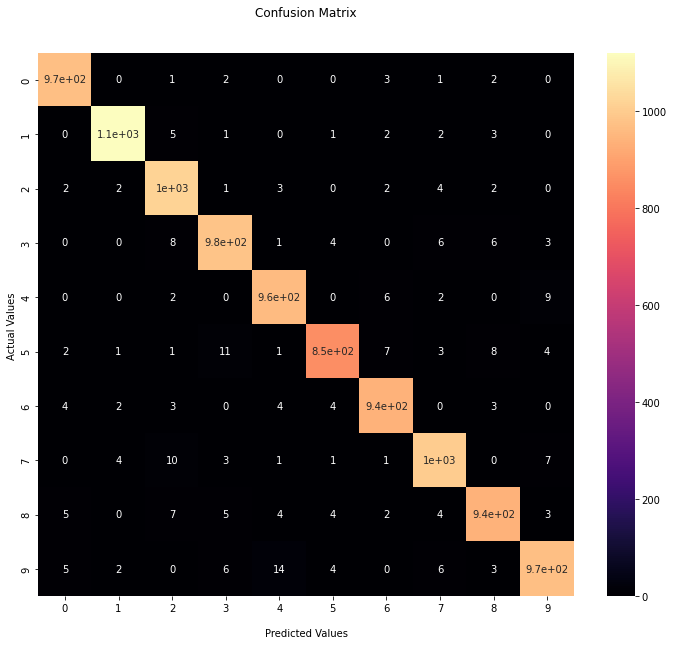

In [27]:
import seaborn as sns
fig = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(10))
ax.yaxis.set_ticklabels(i for i in range(10))

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.98 


                      Classification Report                       
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Taking test set as train set

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(x_test_origin, y_test_origin, test_size=0.3)
ep = 50
mlp5 = Model()
mlp5.add_layer(784, 200, act_fn='sigmoid')
mlp5.add_layer(200, 128, act_fn='sigmoid')
mlp5.add_layer(128, 64, act_fn='sigmoid')
mlp5.add_layer(64, 10, act_fn='softmax')
losses5, accs5 = mlp5.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=256, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.4281322678648268 acc =  0.38066666666666665
epoch  1 loss =  0.3469820449747997 acc =  0.47633333333333333
epoch  2 loss =  0.2624935050221589 acc =  0.659
epoch  3 loss =  0.1938716017420251 acc =  0.7903333333333333
epoch  4 loss =  0.14613420562389423 acc =  0.845
epoch  5 loss =  0.11420813643861275 acc =  0.8783333333333333
epoch  6 loss =  0.09465092757465694 acc =  0.8953333333333333
epoch  7 loss =  0.08290773639721702 acc =  0.906
epoch  8 loss =  0.07563196994563805 acc =  0.9103333333333333
epoch  9 loss =  0.07100631017371417 acc =  0.912
epoch  10 loss =  0.0674075611106306 acc =  0.9163333333333333
epoch  11 loss =  0.06414302388191713 acc =  0.9193333333333333
epoch  12 loss =  0.061352199480887604 acc =  0.924
epoch  13 loss =  0.0590522035510416 acc =  0.9243333333333333
epoch  14 loss =  0.05710263870447115 acc =  0.9256666666666666
epoch  15 loss =  0.055412118941233206 acc =  0.928
epoch  16 loss =  0.053969835346140534 acc =  0.9303333333333333
e

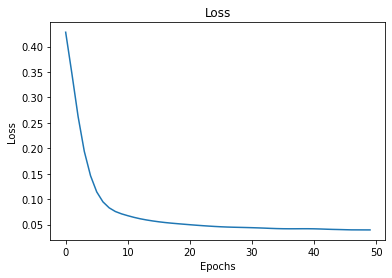

In [36]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses5)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

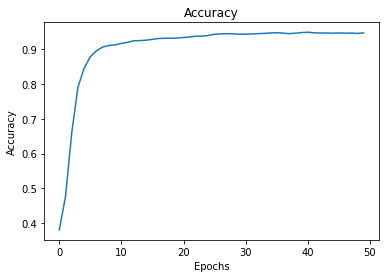

In [37]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs5)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [38]:
pred = mlp5.predict(x_train_origin)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_train_origin)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[5726    1   46    7    9   23   32    5   66    8]
 [   2 6541   53   16   10   17   16   21   49   17]
 [  43   15 5601   52   52    8   27   72   76   12]
 [  26   24  130 5516    5  157   18   83  124   48]
 [  11   16   67    0 5553   10   36   11   26  112]
 [  62   15   17   84   37 4992   85   12   83   34]
 [  44   17   45    2   49   55 5657    0   48    1]
 [  32   17   52   11   76   18    2 5964   16   77]
 [  27   96   69   79   25   79   38   18 5365   55]
 [  48   13   22   58  202   31    4  169   51 5351]]


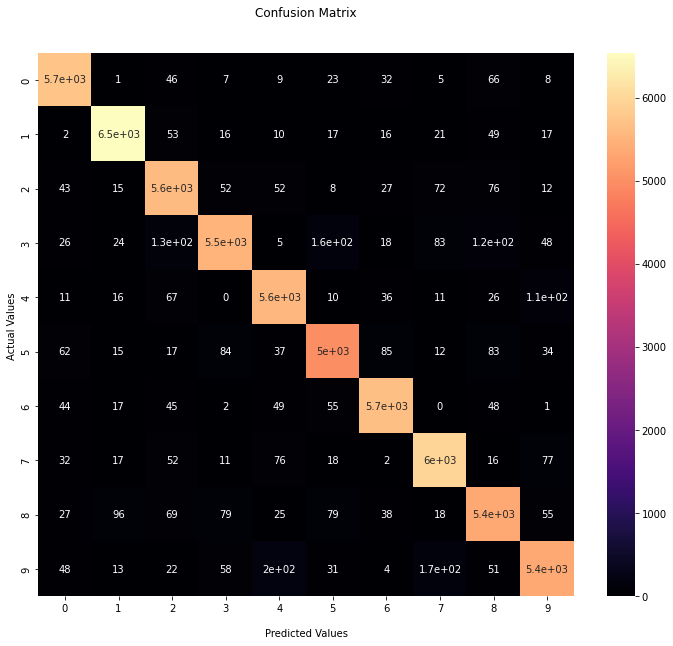

In [39]:
import seaborn as sns
fig = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(10))
ax.yaxis.set_ticklabels(i for i in range(10))

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.91 


                      Classification Report                       
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5923
           1       0.95      0.96      0.95      6742
           2       0.91      0.89      0.90      5958
           3       0.91      0.87      0.89      6131
           4       0.89      0.92      0.91      5842
           5       0.89      0.85      0.87      5421
           6       0.92      0.95      0.94      5918
           7       0.92      0.93      0.92      6265
           8       0.87      0.89      0.88      5851
           9       0.88      0.88      0.88      5949

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

